In [11]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

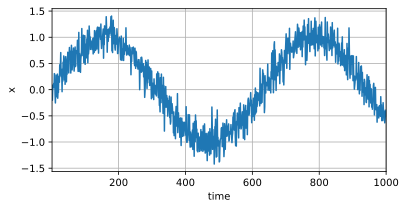

In [12]:
T = 1000  # 总共产生1000个点
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [14]:
x.shape

torch.Size([1000])

In [5]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
# 只有前n_train个样本用于训练
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

In [6]:
features

tensor([[ 0.1642, -0.1201, -0.0544,  0.0394],
        [-0.1201, -0.0544,  0.0394, -0.1640],
        [-0.0544,  0.0394, -0.1640,  0.1802],
        ...,
        [-0.3393, -0.2281, -0.3652, -0.5988],
        [-0.2281, -0.3652, -0.5988, -0.3726],
        [-0.3652, -0.5988, -0.3726, -0.5284]])

In [8]:
features.shape

torch.Size([996, 4])

In [15]:
labels.shape

torch.Size([996, 1])

In [16]:
# 初始化网络权重的函数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

# 一个简单的多层感知机
def get_net():
    net = nn.Sequential(nn.Linear(4, 10),
                        nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weights)
    return net

# 平方损失。注意：MSELoss计算平方误差时不带系数1/2
loss = nn.MSELoss(reduction='none')

In [17]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.091254
epoch 2, loss: 0.066553
epoch 3, loss: 0.060120
epoch 4, loss: 0.056029
epoch 5, loss: 0.055291
